In [1]:
import matplotlib.pyplot as plt
from seaborn import heatmap
from seaborn import pairplot
from besos import eppy_funcs as ef
from besos import sampling
from besos.evaluator import EvaluatorEP
from besos.parameters import RangeParameter, FieldSelector, FilterSelector, Parameter, expand_plist, wwr, CategoryParameter, GenericSelector
from besos.problem import EPProblem
import pandas as pd
import numpy as np

in our project the u-value for both case of ventilation (on/off) is the same

In [3]:
building = ef.get_building('/home/ict4bd_v2/Desktop/project/on_double.idf')
Materials = [material for material in building.idfobjects["MATERIAL"]]
Materials_NoMass = [materials for materials in building.idfobjects["material:NoMass"]]
Materials_NoMass

[
 Material:NoMass,
     LinearBridgingLayer,      !- Name
     Rough,                    !- Roughness
     0.6267,                   !- Thermal Resistance
     0.01,                     !- Thermal Absorptance
     0.01,                     !- Solar Absorptance
     0.01;                     !- Visible Absorptance,
 
 Material:NoMass,
     3_RVAL_3,                 !- Name
     Rough,                    !- Roughness
     0.18,                     !- Thermal Resistance
     0.9,                      !- Thermal Absorptance
     0.7,                      !- Solar Absorptance
     0.7;                      !- Visible Absorptance,
 
 Material:NoMass,
     4_RVAL_2,                 !- Name
     Rough,                    !- Roughness
     0.18,                     !- Thermal Resistance
     0.9,                      !- Thermal Absorptance
     0.7,                      !- Solar Absorptance
     0.7;                      !- Visible Absorptance,
 
 Material:NoMass,
     5_RVAL_2,               

In [5]:
# fixed values
ascExt = 0.04
ascInt = 0.1
horExt = 0.04
horInt = 0.13
desExt = 0.04
desInt = 0.17
condutivity_insulation = .034

To calculate U-Value

In [6]:
uValue_Wall_temp = []
for tick in np.linspace(0.001,0.35,10):    
    layer_wall = [6,7,8]    
    resistance = 0
    for i in layer_wall:    
        thickness_ = Materials[i].Thickness
        conductivity_ = Materials[i].Conductivity
        resistance += (thickness_/conductivity_)
    resistance += (tick/condutivity_insulation)
    U_val = (round(1/(horExt+horInt+resistance),4))
    uValue_Wall_temp.append({'U-Value': U_val,
                             'Thickness': tick})
uValue_Wall = pd.DataFrame.from_dict(uValue_Wall_temp)
uValue_Wall

,U-Value,Thickness
0,1.8670,0.001000
1,0.5966,0.039778
2,0.3550,0.078556
3,0.2527,0.117333
4,0.1962,0.156111
5,0.1603,0.194889
6,0.1355,0.233667
7,0.1174,0.272444
8,0.1035,0.311222
9,0.0926,0.350000


In [7]:
uValue_roof_temp = []
for tick in np.linspace(0.001,0.35,10):    
    layer_roof = [1,3]    
    resistance = 0
    for i in layer_roof:    
        thickness_ = Materials[i].Thickness
        conductivity_ = Materials[i].Conductivity
        resistance += (thickness_/conductivity_)
    resistance += (tick/condutivity_insulation)
    resistance += Materials_NoMass[1].Thermal_Resistance
    U_val = (round(1/(ascExt+ascInt+desInt+desExt+resistance),4))
    uValue_roof_temp.append({'U-Value': U_val,
                             'Thickness': tick})
uValue_roof = pd.DataFrame.from_dict(uValue_roof_temp)
uValue_roof

,U-Value,Thickness
0,1.1598,0.001000
1,0.4993,0.039778
2,0.3181,0.078556
3,0.2334,0.117333
4,0.1844,0.156111
5,0.1523,0.194889
6,0.1298,0.233667
7,0.1130,0.272444
8,0.1001,0.311222
9,0.0899,0.350000


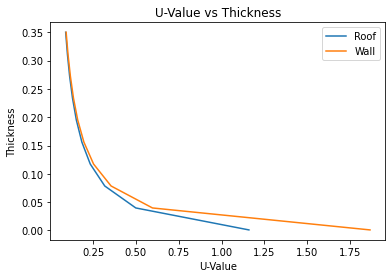

In [8]:
fig = plt.figure()
plt.plot(uValue_roof['U-Value'],uValue_roof['Thickness'],label='Roof')
plt.plot(uValue_Wall['U-Value'],uValue_Wall['Thickness'],label='Wall')

plt.xlabel('U-Value')
plt.ylabel('Thickness')
plt.title('U-Value vs Thickness')
plt.legend()
plt.show()